In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
from rdkit import Chem
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
base_path = os.getcwd()

/home/kamesh-k/anaconda3/envs/rdkit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kamesh-k/anaconda3/envs/rdkit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kamesh-k/anaconda3/envs/rdkit/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kamesh-k/anaconda3/envs/rdkit/lib/pyt

In [2]:
data_path = base_path[:-12]+'DataSets/' # Depending the folder name the value 12 will vary, can be replaced by a small snippet of code if needed 

In [3]:
os.chdir(data_path)
train_data_1 = pd.read_csv('train_data_1.csv')
train_data_2 = pd.read_csv('train_data_2.csv')
os.chdir(base_path)

In [4]:
train_data_1.describe()

,index,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,CV
count,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000
mean,66942.000000,9.814382,1.406097,1.124921,2.706037,75.191296,-0.239977,0.011124,0.251100,1189.527450,0.148524,-411.543985,-411.535513,-411.534569,-411.577397,31.600676
std,38649.414733,1809.465666,1.583795,1.095618,1.530394,8.187793,0.022131,0.046936,0.047519,279.757172,0.033274,40.060230,40.060012,40.060012,40.060741,4.062471
min,0.000000,0.000000,0.337120,0.331180,0.000000,6.310000,-0.428600,-0.175000,0.024600,19.000200,0.015951,-714.568061,-714.560153,-714.559209,-714.602138,6.002000
25%,33471.000000,2.554430,1.091630,0.910480,1.588700,70.380000,-0.252500,-0.023800,0.216300,1018.322600,0.125289,-437.913936,-437.905942,-437.904997,-437.947682,28.942000
50%,66942.000000,3.090360,1.369940,1.078560,2.500000,75.500000,-0.241000,0.012000,0.249400,1147.585800,0.148329,-417.864758,-417.857351,-417.856407,-417.895731,31.555000
75%,100413.000000,3.835820,1.653980,1.279540,3.636100,80.520000,-0.228700,0.049200,0.288200,1308.816600,0.171150,-387.049166,-387.039746,-387.038802,-387.083279,34.276000
max,133884.000000,619867.683140,437.903860,282.945450,29.556400,196.620000,-0.101700,0.193500,0.622100,3374.753200,0.273944,-40.478930,-40.476062,-40.475117,-40.498597,46.969000


In [5]:
train_data_2.describe()

,index,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,CV
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,3047.000000,2.987290,1.399757,1.143595,2.245983,76.237482,-0.240667,0.021889,0.262556,1185.303637,0.156478,-422.537512,-422.528937,-422.527993,-422.570907,32.311137
std,1759.619277,0.824335,0.354020,0.267686,0.960131,2.316760,0.011724,0.044412,0.043320,239.448572,0.001966,0.034052,0.034099,0.034099,0.034095,2.395529
min,0.000000,1.463538,0.381853,0.379867,0.003800,71.450000,-0.279730,-0.096370,0.141390,828.180000,0.150991,-422.629584,-422.622605,-422.621660,-422.662154,25.710000
25%,1523.500000,2.460825,1.164438,0.967887,1.586550,74.570000,-0.247750,-0.019795,0.222270,1035.972300,0.155181,-422.562300,-422.553945,-422.552999,-422.595230,30.728500
50%,3047.000000,2.803668,1.420784,1.144443,2.208600,75.800000,-0.240960,0.015140,0.263070,1128.956300,0.156448,-422.537107,-422.528357,-422.527412,-422.570710,32.207000
75%,4570.500000,3.297857,1.654440,1.311691,2.839700,77.490000,-0.233880,0.067820,0.303380,1260.306600,0.157811,-422.513107,-422.504387,-422.503443,-422.546365,33.637000
max,6094.000000,11.539460,2.341566,2.087373,5.556000,86.240000,-0.181390,0.103950,0.354120,2751.248700,0.162739,-422.388768,-422.380484,-422.379540,-422.420789,39.471000


In [6]:
data = pd.concat([train_data_1,train_data_2],ignore_index=True)
data = data.drop(columns='index')

In [7]:
data.head()

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,CV,Structure
0,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,C
1,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,N
2,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,O
3,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,C#C
4,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,C#N


In [8]:
data['Structure'][0]

'C'

In [102]:
superset = ''.join(data['Structure'])
encoders = list(set(superset))
encoders

['-',
 'C',
 '=',
 '(',
 ')',
 '2',
 'F',
 '4',
 'N',
 '1',
 'O',
 '3',
 '5',
 '#',
 'H',
 '[',
 ']',
 '+']

In [9]:
mask_data = np.zeros(len(data))
for i in range(len(data)):
    structure = data['Structure'][i]
    if 'N' in structure or 'F' in structure:
        continue
    else:        
        mask_data[i] = 1

In [10]:
print("{}% of the data is considered for the model training".format(round((mask_data.sum()/len(data)*100))))

41.0% of the data is considered for the model training


In [13]:
train_data = pd.DataFrame(data[mask_data==1])
train_data.head()
train_data.to_csv("Train_Data.csv",index=False)

In [2]:
train_data = pd.read_csv("Train_Data.csv")

## Zeroth order Fingerprint 

In [3]:
max_size = len(train_data)
fingerprint_0 = np.zeros((max_size,3))
structures = np.array(train_data['Structure'])
for index in range(max_size):
    m = Chem.MolFromSmiles(structures[index])
    n = m.GetNumAtoms(onlyExplicit=False)
    carbon = 0
    oxygen = 0 
    hydrogen = 0 
    for x in m.GetAtoms():
            if x.GetAtomicNum() == 6:
                carbon = carbon + 1 
            elif x.GetAtomicNum() == 8:
                oxygen = oxygen + 1 
    hydrogen = m.GetNumAtoms(onlyExplicit=False) - carbon - oxygen 
    fingerprint_0[index,0] = float(carbon/n)
    fingerprint_0[index,1] = float(oxygen/n)
    fingerprint_0[index,2] = float(hydrogen/n)

In [4]:
fingerprint_0

array([[0.2       , 0.        , 0.8       ],
       [0.        , 0.33333333, 0.66666667],
       [0.5       , 0.        , 0.5       ],
       ...,
       [0.36842105, 0.10526316, 0.52631579],
       [0.36842105, 0.10526316, 0.52631579],
       [0.36842105, 0.10526316, 0.52631579]])

## First Order Fingerprint 

In [20]:
max_size = len(train_data)
fingerprint_1 = np.zeros((max_size,6))
structures = np.array(train_data['Structure'])

In [8]:
possible_athyd = []
for i in range(max_size):
    m = Chem.AddHs(Chem.MolFromSmiles(structures[i]))
    Chem.Kekulize(m)
    n = m.GetNumAtoms(onlyExplicit=False)
    for x in m.GetAtoms():
        atom = x.GetSymbol()
        hybr = str(len(x.GetBonds()))
        possible_athyd.append(atom+hybr)

In [10]:
set(possible_athyd)

{'C2', 'C3', 'C4', 'H1', 'O1', 'O2'}

In [21]:
hybridization_dict = dict(zip(list(set(possible_athyd)),range(6)))
for index in range(max_size):
    m = Chem.AddHs(Chem.MolFromSmiles(structures[index]))
    Chem.Kekulize(m)    
    n = m.GetNumAtoms(onlyExplicit=False)
    for x in m.GetAtoms():
        atom = x.GetSymbol()
        hybr = str(len(x.GetBonds()))
        atom_hybr = atom+hybr
        coordination = hybridization_dict[atom_hybr]
        fingerprint_1[index,coordination] = fingerprint_1[index,coordination] + 1
    fingerprint_1[index,:] = fingerprint_1[index,:]/n

## Second Order Fingerprint 

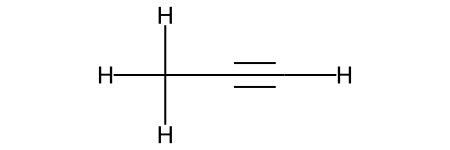

In [53]:
m = Chem.AddHs(Chem.MolFromSmiles(structures[6]))
m

In [93]:
def query_bonds(molecule):
    structure_bonds = []
    Chem.Kekulize(molecule)
    molecule_size = len(molecule.GetAtoms())
    hybridization_atoms = []
    for x in molecule.GetAtoms():
        y = x.GetBonds()
        for z in y:
            a1 = str(z.GetBeginAtomIdx())
            a2 = str(z.GetEndAtomIdx())
            hybrd_1 = str(len(molecule.GetAtomWithIdx(int(a1)).GetBonds()))
            hybrd_2 = str(len(molecule.GetAtomWithIdx(int(a2)).GetBonds()))
            sym_1 = str(molecule.GetAtomWithIdx(int(a1)).GetSymbol())
            sym_2 = str(molecule.GetAtomWithIdx(int(a2)).GetSymbol())
            fingerprint_bond = sorted([sym_1+hybrd_1,sym_2+hybrd_2])
            fingerprint_bond = ''.join(fingerprint_bond)
            bond_between = a1+'-'+a2+'#'+sym_1+'-'+hybrd_1+'-'+sym_2+'-'+hybrd_2+'#'+fingerprint_bond
            structure_bonds.append(bond_between)
    return set(structure_bonds)

In [92]:
m = Chem.AddHs(Chem.MolFromSmiles(structures[0]))
bonds = query_bonds(m)
bonds_split = []
for i in bonds:
    bonds_split.append(i.split('#'))
bonds_split = np.array(bonds_split).flatten()
bonds_split = np.reshape(bonds_split,(int(len(bonds_split)/3),3))
bonds_in_molecule = bonds_split[:,2]
bonds_in_molecule

array(['C4H1', 'C4H1', 'C4H1', 'C4H1'], dtype='<U7')

In [94]:
possible_bonds = []
for index in range(max_size):
    m = Chem.AddHs(Chem.MolFromSmiles(structures[index]))
    bonds = query_bonds(m)
    bonds_split = []
    for i in bonds:
        bonds_split.append(i.split('#'))
    bonds_split = np.array(bonds_split).flatten()
    bonds_split = np.reshape(bonds_split,(int(len(bonds_split)/3),3))
    possible_bonds.append(list(set(bonds_split[:,2])))

In [58]:
possible_bonds_flat = []
for sublist in possible_bonds:
    for item in sublist:
        possible_bonds_flat.append(item)

In [59]:
AB_Bond = dict(zip(set(possible_bonds_flat),range(len(possible_bonds_flat))))
AB_Bond

{'C4C4': 0,
 'C2C2': 1,
 'C3O1': 2,
 'C4H1': 3,
 'C3C3': 4,
 'C3O2': 5,
 'C2H1': 6,
 'C3H1': 7,
 'C2C4': 8,
 'H1O2': 9,
 'C2C3': 10,
 'C3C4': 11,
 'C4O2': 12}

In [81]:
max_size = len(train_data)
fingerprint_2 = np.zeros((max_size,len(AB_Bond)))
for index in range(max_size):
    m = Chem.AddHs(Chem.MolFromSmiles(structures[index]))
    n = m.GetNumAtoms(onlyExplicit=False)
    bonds = query_bonds(m)
    bonds_split = []
    for i in bonds:
        bonds_split.append(i.split('#'))
    bonds_split = np.array(bonds_split).flatten()
    bonds_split = np.reshape(bonds_split,(int(len(bonds_split)/3),3))
    bonds_in_molecule = bonds_split[:,2]
    for b in bonds_in_molecule:
        fingerprint_2[index,AB_Bond[b]]= fingerprint_2[index,AB_Bond[b]] +1 
    fingerprint_2[index,:] = fingerprint_2[index,:]/len(bonds_in_molecule)

## Third Order Fingerprint

In [161]:
def query_pair_bonds(molecule):
    m = Chem.AddHs(Chem.MolFromSmiles(molecule))
    coordination = np.zeros(len(m.GetAtoms()),dtype=np.int64)
    Chem.Kekulize(m)
    atoms = m.GetAtoms()
    num_atoms = len(atoms)
    for atom_id in range(num_atoms):
        bonds = atoms[atom_id].GetBonds()
        coordination[atom_id] = int(len(bonds))    
    triplets = []
    for atom_id in range(num_atoms):
        bonds= atoms[atom_id].GetBonds()
        num_bonds = len(bonds)
        mid_sym = atoms[atom_id].GetSymbol()
        mid_hybrd = coordination[atom_id]
        for bond_1 in range(num_bonds):
            for bond_2 in range(num_bonds):
                if bond_1 == bond_2:
                    continue
                else:
                    a1 = bonds[bond_1].GetOtherAtomIdx(atom_id)
                    a2 = bonds[bond_2].GetOtherAtomIdx(atom_id)
#                     if a1>a2:
#                         str_1 = str(a1)+'-'+str(atom_id)+'-'+str(a2) 
#                     else:
#                         str_1 = str(a2)+'-'+str(atom_id)+'-'+str(a1)

                    sym_1 = atoms[a1].GetSymbol()
                    sym_2 = atoms[a2].GetSymbol()
                    hybrd_1 = coordination[a1]
                    hybrd_2 = coordination[a2]
                    fingerprint_bond = str(mid_sym)+str(int(mid_hybrd))+''.join(sorted([sym_1+str(int(hybrd_1)),sym_2+str(hybrd_2)]))
                    triplets.append(str_1 +'#'+ fingerprint_bond)
    return set(triplets)

In [166]:
possible_3_atom_structures = []
for structure in structures:
    bonds = query_pair_bonds(structure)
    bonds_split = []
    for i in bonds:
        bonds_split.append(i.split('#'))
    bonds_split = np.array(bonds_split).flatten()
    bonds_split = np.reshape(bonds_split,(int(len(bonds_split)/2),2))
    bonds_in_molecule = bonds_split[:,1]
    possible_3_atom_structures.append(set(bonds_in_molecule))

In [167]:
possible_3_atom_flat = []
for sublist in possible_3_atom_structures:
    for item in sublist:
        possible_3_atom_flat.append(item)

In [208]:
ABC_Bond = dict(zip(set(possible_3_atom_flat),range(len(set(possible_3_atom_flat)))))
ABC_Bond

{'C4C2O2': 0,
 'C4H1H1': 1,
 'C3C3O1': 2,
 'C4O2O2': 3,
 'C3C2O2': 4,
 'C3C2C2': 5,
 'O2H1H1': 6,
 'C4C2C2': 7,
 'C3H1O1': 8,
 'C3C2C3': 9,
 'C3C3C3': 10,
 'C4C2C3': 11,
 'C3O2O2': 12,
 'C3C3O2': 13,
 'C4C4H1': 14,
 'O2C4H1': 15,
 'C4C2C4': 16,
 'C3C3C4': 17,
 'O2C4C4': 18,
 'C4H1O2': 19,
 'O2C3C4': 20,
 'C3C3H1': 21,
 'O2C3H1': 22,
 'C4C3H1': 23,
 'C4C3O2': 24,
 'C3C2C4': 25,
 'C4C3C3': 26,
 'C3H1O2': 27,
 'C2C2H1': 28,
 'C2C2C3': 29,
 'C3C4H1': 30,
 'C3C4C4': 31,
 'C2C2C2': 32,
 'C3C2O1': 33,
 'C3C2H1': 34,
 'C3O1O2': 35,
 'C3C4O1': 36,
 'O2C3C3': 37,
 'C3H1H1': 38,
 'C2C2C4': 39,
 'C4C3C4': 40,
 'C4C4O2': 41,
 'C4C4C4': 42,
 'C3C4O2': 43,
 'C4C2H1': 44}

In [212]:
max_size = len(train_data)
fingerprint_3 = np.zeros((max_size,len(ABC_Bond)))
for index in range(max_size):
    bonds = query_pair_bonds(structures[index])
    bonds_split = []
    for i in bonds:
        bonds_split.append(i.split('#'))
    bonds_split = np.array(bonds_split).flatten()
    bonds_split = np.reshape(bonds_split,(int(len(bonds_split)/2),2))
    bonds_in_molecule = bonds_split[:,1]
    for b in bonds_in_molecule:
        fingerprint_3[index,ABC_Bond[b]]= fingerprint_3[index,ABC_Bond[b]] +1 
    fingerprint_3[index,:] = fingerprint_3[index,:]/len(bonds_in_molecule)